In [9]:
#import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#load data
data=pd.read_csv(r"E:\datasets\sonar dataset\sonar.csv")

In [11]:
data.shape
#208 rows and 61 columns

(208, 61)

In [12]:
#check all stats
data.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A51,A52,A53,A54,A55,A56,A57,A58,A59,A60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [14]:
# class distribution
data.groupby('Class').size()

Class
M    111
R     97
dtype: int64

In [15]:
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

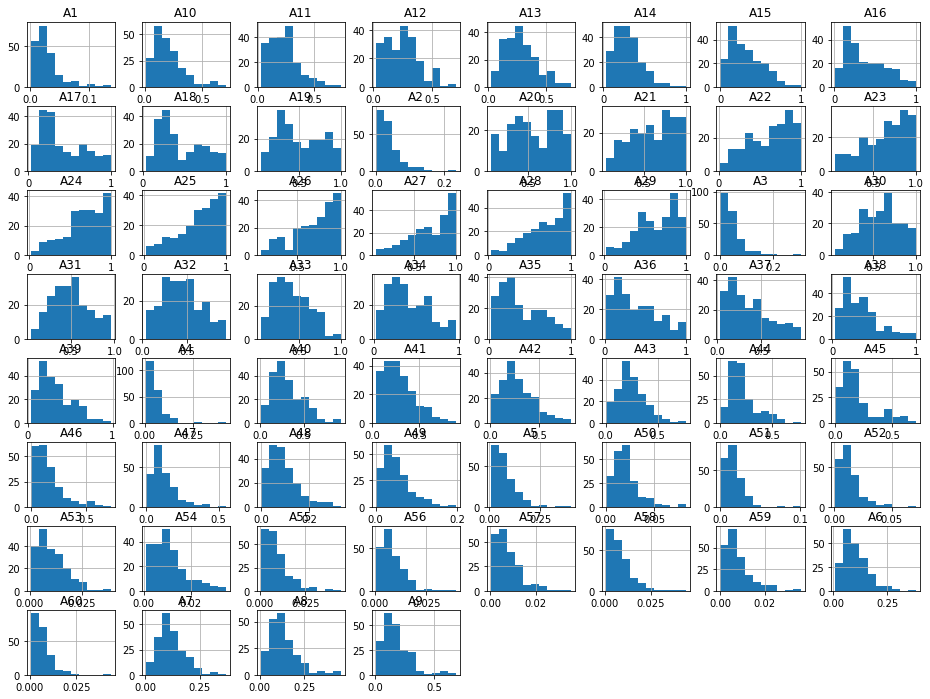

In [16]:
# Histograms for each attribute
data.hist()
pyplot.show()

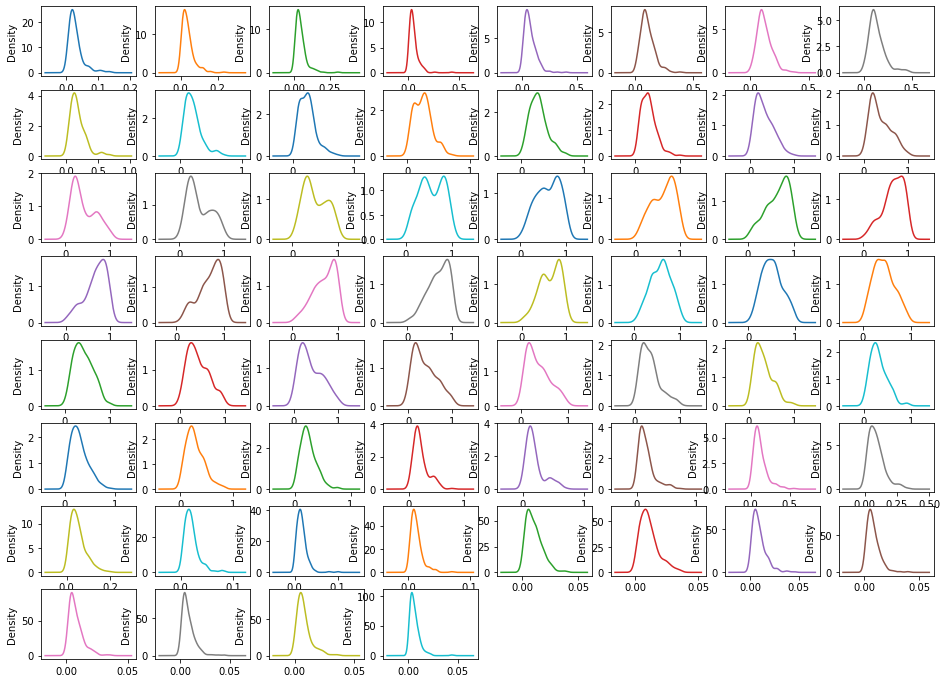

In [17]:
# Density plot for each attribute
data.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False)
pyplot.show()

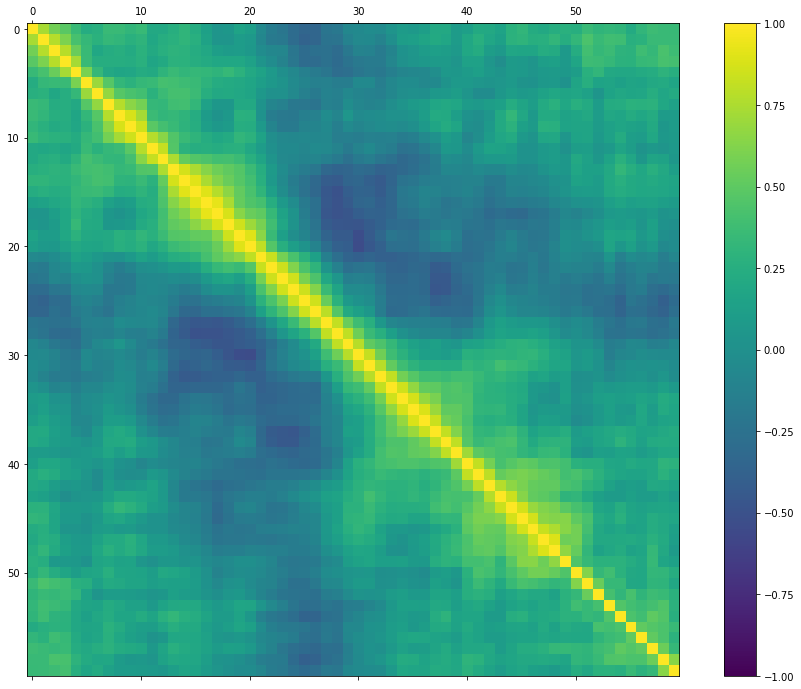

In [18]:
# Correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

In [20]:
# convert 'Class' column to 'category' data type
X = data.drop('Class', 1)
data['Class'] = data['Class'].astype('category')
y = data['Class']

In [22]:
# split data into train / test data sets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [23]:
# fit the logistic regression model
logReg = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [24]:
# evaluate the model on test data set
y_pred = logReg.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[24  1]
 [15  2]]


In [25]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6190476190476191


In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# run the naive bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [28]:
nb.score(X_test, y_test)

0.6190476190476191

In [29]:

y_pred = nb.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[12 13]
 [ 3 14]]


In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6190476190476191


In [31]:
#Lets now try with support vector machine model
svc = SVC(random_state=42, probability=True)
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [36]:
#train test
svc.score(X_test, y_test)

0.8333333333333334

In [33]:
#svc confusion matrix
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[25  0]
 [ 7 10]]


In [34]:
#Random Forest CLassifier

In [35]:

from sklearn.ensemble import RandomForestClassifier

In [37]:
rf = RandomForestClassifier(random_state=42)

In [38]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [39]:
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[23  2]
 [ 5 12]]


In [40]:
rf.score(X_test, y_test)

0.8333333333333334

In [ ]:
#We can say that Random forest and SVM has best score 